# Coursera courses analysis

In this analysis, we explore the Coursera courses dataset to gain insights into the types of courses and certificates offered, as well as the quality of courses provided by different organizations. Specifically, we seek to understand whether Coursera is a platform that caters primarily to advanced students or if it is better suited to individuals seeking introductory or intermediate-level content. Through our analysis, we aim to provide a comprehensive picture of Coursera as a platform and its value for learners of different levels.

In [240]:
# Importing libraries and dataset from Coursera Courses

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import seaborn as sns

df = pd.read_csv('sample_data/coursea_data.csv', index_col=0).sort_index()
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


### Cleaning data

In [252]:
# Tidying up dataset column names by removing course since we already defined that this is a coursera 
# course dataset.

df.columns = df.columns.str.replace('course_', '').str.lower()
df.columns

Index(['title', 'organization', 'certificate_type', 'rating', 'difficulty',
       'students_enrolled'],
      dtype='object')

In [242]:
print(f'This dataset has {df.shape[0]} observations and {df.shape[1]} features.')

This dataset has 891 observations and 6 features.


In [243]:
# Checking if there is any empty value in the dataset
df.isnull().any()

title                False
organization         False
certificate_type     False
rating               False
difficulty           False
students_enrolled    False
dtype: bool

In [244]:
# Checking if there is any duplicated in the dataset
df.duplicated().any()

False

In [245]:
# Checking each feature datatype to adjust if needed
df.dtypes

title                 object
organization          object
certificate_type      object
rating               float64
difficulty            object
students_enrolled     object
dtype: object

In [246]:
# Most of the columns might have mixed data types. We will work with string datatype for the
# storing columns: title, organization, certificate_type and course difficuly.
# for the rating and students_enrolled column we need them as floats.

df = df.astype({"title": 'string', "organization": 'string', "certificate_type": 'string', "difficulty": 'string'})
df.dtypes

title                 string
organization          string
certificate_type      string
rating               float64
difficulty            string
students_enrolled     object
dtype: object

In [247]:
# Exploring Certificate_type and course_difficulty column to assure there's not wrong values
df['difficulty'].unique()

<StringArray>
['Beginner', 'Mixed', 'Intermediate', 'Advanced']
Length: 4, dtype: string

In [248]:
df.certificate_type = df.certificate_type.str.title()
df['certificate_type'].unique()

<StringArray>
['Professional Certificate', 'Specialization', 'Course']
Length: 3, dtype: string

In [249]:
# Exploring students_enrolled column to convert all to floats
df['students_enrolled']

0      480k
1      310k
2      2.5m
3      1.5m
4      350k
       ... 
886     11k
887     33k
888    6.6k
889     45k
890    6.4k
Name: students_enrolled, Length: 891, dtype: object

In [250]:
# Function that takes number of students enrolled variable and check's if there's an m or a x and if there is 
# converts the value to digit
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0


# Applying the function to the students enrolled column.
df['students_enrolled'] = df['students_enrolled'].apply(value_to_float)
df['students_enrolled']

0       480000.0
1       310000.0
2      2500000.0
3      1500000.0
4       350000.0
         ...    
886      11000.0
887      33000.0
888       6600.0
889      45000.0
890       6400.0
Name: students_enrolled, Length: 891, dtype: float64

In [251]:
# Printing final cleaned dataframe for our analysis
df.head()

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,Professional Certificate,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,Specialization,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,Course,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,Specialization,4.8,Beginner,1500000.0
4,Google IT Support,Google,Professional Certificate,4.8,Beginner,350000.0


### Exploring numerical data and visualizing some relevant data

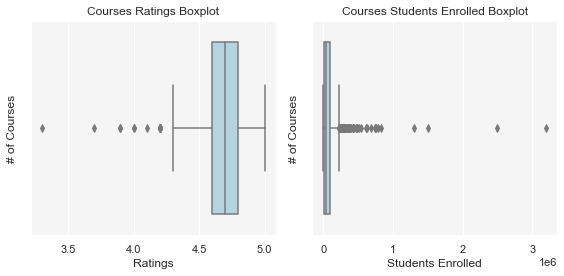

In [233]:
# Identifying outliers for ratings and students enrolled columns

hist_data = [df['rating'].values, df['students_enrolled'].values]
titles = ['Courses Ratings Boxplot', 'Courses Students Enrolled Boxplot']
xlabels = ['Ratings', 'Students Enrolled']
ylabels = ['# of Courses'] * 2

fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'whitesmoke'})

for i, data in enumerate(hist_data):
    sns.boxplot(x=data, color="lightblue", ax=ax.flat[i])
    ax.flat[i].set_xlabel(xlabels[i])
    ax.flat[i].set_ylabel(ylabels[i])
    ax.flat[i].set_title(titles[i])

fig.tight_layout()
plt.show()


Since the students enrolled is data based on the actual students enrolled I don't think we should exclude those courses from our study. The reasons I believe this courses has such high amount of students enrolled might be because of the popularity of the topics in that courses, the price being free or how highly rated is.

In [234]:
df[df['students_enrolled'] > 1000000]

,title,organization,certificate_type,rating,difficulty,students_enrolled
2,The Science of Well-Being,Yale University,Course,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,Specialization,4.8,Beginner,1500000.0
6,Machine Learning,Stanford University,Course,4.9,Mixed,3200000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,Course,4.8,Mixed,1300000.0


If we observe above both courses with such high amount of studenets enrolled are courses with very high ratings 4.9 out of 5.0.

Unfortunately the price of the courses and the topic is not data available in our dataset. It would have been great to analyze those factors and improve the analysis. 

Although we don't have data proving so and the most discussed topics, I agree that all the courses with high number of enrolled students are popular topics in the net nowadays. Programming, Data and well-being.

#### Ratings and students enrolled distribution and central tendency

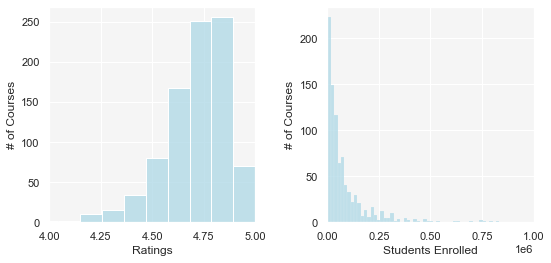

In [235]:
# Visualizing the distribution of ratings and students enrolled

hist_data = [df['rating'].values, df['students_enrolled'].values]
xlabels = ['Ratings', 'Students Enrolled']
ylabels = ['# of Courses'] * 2
bins = [16,200]

fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.set(font_scale=1.5)

for i, data in enumerate(hist_data):
    sns.histplot(data, kde=False, bins=bins[i], color="lightblue", ax=ax.flat[i])
    # we use flat to access to each element of the ax array
    ax.flat[i].set_xlabel(xlabels[i])
    ax.flat[i].set_ylabel(ylabels[i])
    if i == 0:
        ax.flat[i].set_xlim(4.0, 5.0)
    elif i == 1:
        ax.flat[i].set_xlim(0.0, 1000000.0)

fig.tight_layout()
plt.show()

I observe a left skewed distribution on the ratings distribution plot, meaning that all the vast majority of points are concentrated towards the right side, most of the courses has high ratings and ranges between 4.6 and 4.8. on the contrary, the students enrolled distribution shows the tail extending to the right, this a right skewed distribution, indicating that there are only a courses that has more students enrolled than the majority of the data points.

In [254]:
# Describing ratings and students enrolled column
df[['rating', 'students_enrolled']].describe()

,rating,students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


#### Distribution difficulty levels and certificates types based on students enrolled

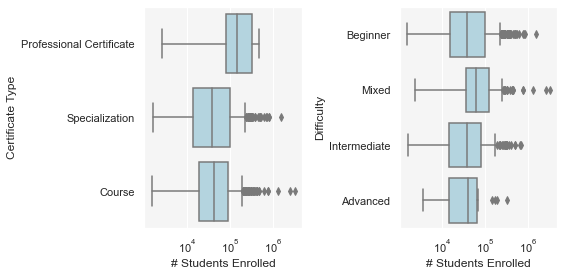

In [271]:
# Boxplot that counts all courses per certificates based on the number of students enrolled

ydata = [df['certificate_type'], df['difficulty']]
ylabels = ['Certificate Type', 'Difficulty']
xlabels = ['# Students Enrolled'] * 2

fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'whitesmoke'})

for i, data in enumerate(ydata):
    sns.boxplot(x=df['students_enrolled'], y=ydata[i], color='lightblue', ax=ax.flat[i])
    ax.flat[i].set_xlabel(xlabels[i])
    ax.flat[i].set_ylabel(ylabels[i])
    ax.flat[i].set_xscale('log') # set log scale for x-axis


fig.tight_layout()
plt.show()


#### Distribution of difficulty levels and certificates types based on ratings

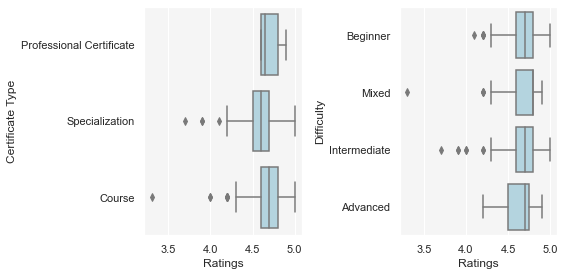

In [275]:
# Boxplot that counts all courses per certificates based on the course ratings

ydata = [df['certificate_type'], df['difficulty']]
ylabels = ['Certificate Type', 'Difficulty']
xlabels = ['Ratings'] * 2

fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'whitesmoke'})

for i, data in enumerate(ydata):
    sns.boxplot(x=df['rating'], y=ydata[i], color='lightblue', ax=ax.flat[i])
    ax.flat[i].set_xlabel(xlabels[i])
    ax.flat[i].set_ylabel(ylabels[i])

fig.tight_layout()
plt.show()

#### Relationship between ratings and students enrolled

Text(0.5, 1.0, 'Correlation between ratings and students enrolled')

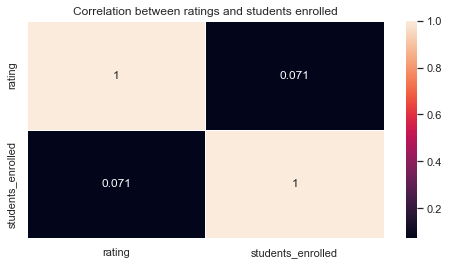

In [279]:
correlation = df.corr()
correlation
plt.figure(figsize=(8,4))
sns.heatmap(correlation, annot=True, linewidths=.5).set_title('Features correlation')
plt.title('Correlation between ratings and students enrolled')

Text(0.5, 1.0, 'Correlation between ratings and students enrolled')

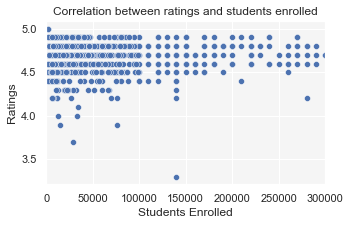

In [280]:
# Let's go further visualizing correlation with a scatter plot

y = np.array([df['rating']])
x = np.array([df['students_enrolled']])

plt.figure(figsize=(5,3))
sns.scatterplot(data=df, x="students_enrolled", y="rating")
plt.xlim(0, 300000)
plt.xlabel("Students Enrolled")
plt.ylabel("Ratings")
plt.title('Correlation between ratings and students enrolled')

The correlation between rating and students enrolled is very low. The courses with higher number of students enrolled tend to have higher ratings.

## Exploring categorical variables

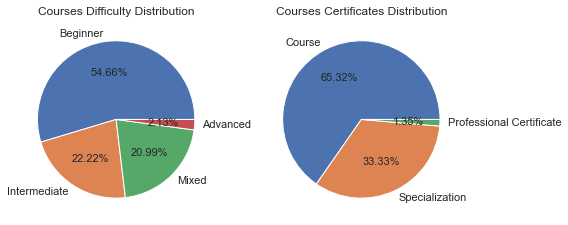

In [281]:
# Visualizing the count of courses for each category

hist_data = [df['difficulty'].value_counts(), df['certificate_type'].value_counts()]
titles = ['Courses Difficulty Distribution', 'Courses Certificates Distribution']

fig, ax = plt.subplots(1, 2, figsize=(8,4))
plt.rcParams.update({'font.size': 11})

for i, data in enumerate(hist_data):
    ax[i].pie(data.values, labels = data.index, autopct='%1.2f%%')
    ax[i].set_title(titles[i])

fig.tight_layout()
plt.show()

More than half of the courses in the dataset are focused on beginner-level content, which is an important finding. Additionally, most of the courses offer courses certificates type rather than professional certificates, with only 1.35% of courses offering the latter. Specializations are the second most common type of certificate offered after courses. The remaining courses offered are typically, for intermediate or mixed-level content

#### Difficulty levels per certifications

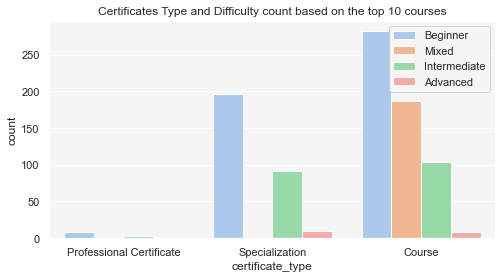

In [282]:
# Visualizing difficulty levels based on the specializations

sns.set(rc={'figure.figsize':(8, 4), 'axes.facecolor':'whitesmoke',})
sns.countplot(data=df, 
              x='certificate_type', palette="pastel",
              hue='difficulty').set(title="Certificates Type and Difficulty count based on the top 10 courses")

# Place legend to the right
plt.legend(loc='upper right')
fig.tight_layout()
plt.show()

In [283]:
# Checking top 10 courses as per higher number of students enrolled and highest ratings
top_courses = df[df['rating'] >= 4.9].sort_values(by='students_enrolled', 
                                                   ascending=False).head(10)
top_courses

,title,organization,certificate_type,rating,difficulty,students_enrolled
6,Machine Learning,Stanford University,Course,4.9,Mixed,3200000.0
2,The Science of Well-Being,Yale University,Course,4.9,Mixed,2500000.0
62,Neural Networks and Deep Learning,deeplearning.ai,Course,4.9,Intermediate,630000.0
111,Python Data Structures,University of Michigan,Course,4.9,Mixed,420000.0
113,First Step Korean,Yonsei University,Course,4.9,Beginner,400000.0
29,Introduction to Psychology,Yale University,Course,4.9,Beginner,270000.0
123,Improving Deep Neural Networks: Hyperparameter...,deeplearning.ai,Course,4.9,Beginner,270000.0
11,Excel Skills for Business,Macquarie University,Specialization,4.9,Beginner,240000.0
207,Convolutional Neural Networks,deeplearning.ai,Course,4.9,Intermediate,240000.0
21,COVID-19 Contact Tracing,Johns Hopkins University,Course,4.9,Beginner,220000.0


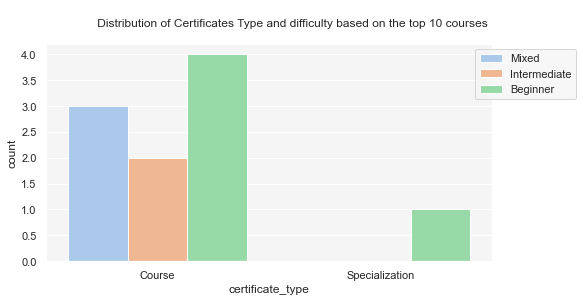

In [284]:
# Visualizing certificates and difficulties level for the top 10 courses

sns.set(rc={'figure.figsize':(8, 4), 'axes.facecolor':'whitesmoke',})
sns.countplot(data=top_courses, 
              x='certificate_type', palette="pastel",
              hue='difficulty').set(title="""
              Distribution of Certificates Type and difficulty based on the top 10 courses
              """)

# Place legend to the right
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
fig.tight_layout()
plt.show()

We can see that the most popular certifications are the Courses types and most of them are beginner friendly
but also we can observe a high amount of mixed difficulty level.

All the Professional certificates are for beginners meanwhile specializations are for beginners or 
for intermediate students. Only a minority are advanced level.

## Organizations overview

In [285]:
# How many organizations has courses on Coursera?
print(f" There's {len(df['organization'].unique())} organizations that has courses in Coursera")

 There's 154 organizations that has courses in Coursera


In [286]:
# Checking top 10 organizations with higher ratings and students enrolled

organizations_mean = df.groupby('organization').mean()
top_org_coursera_mean = organizations_mean[organizations_mean['rating'] >= 4.8].sort_values(
    by='students_enrolled', ascending=False).head(10)
top_org_coursera_mean

,rating,students_enrolled
organization,,
Yale University,4.817647,232470.588235
McMaster University,4.800000,230000.000000
Google - Spectrum Sharing,4.900000,210000.000000
École Polytechnique,4.800000,190000.000000
Hebrew University of Jerusalem,4.900000,95000.000000
Berklee College of Music,4.807143,92000.000000
The University of Chicago,4.850000,84000.000000
Macquarie University,4.800000,74433.333333
Universidade de São Paulo,4.866667,68500.000000


In [287]:
# Let's quick check how the data is distributed with a box plot
top_org_coursera_mean.describe()

,rating,students_enrolled
count,10.000000,10.000000
mean,4.836146,133748.392157
std,0.040334,72083.738234
min,4.800000,61080.000000
25%,4.801786,76825.000000
50%,4.818824,93500.000000
75%,4.862500,205000.000000
max,4.900000,232470.588235


In [288]:
# How the certificates types and difficulties of the courses are distributed for the top organizations
top_org_coursera = df[df['organization'].isin(top_organizations.index)]
top_org_coursera.head()

,title,organization,certificate_type,rating,difficulty,students_enrolled
2,The Science of Well-Being,Yale University,Course,4.9,Mixed,2500000.0
11,Excel Skills for Business,Macquarie University,Specialization,4.9,Beginner,240000.0
14,Financial Markets,Yale University,Course,4.8,Beginner,470000.0
29,Introduction to Psychology,Yale University,Course,4.9,Beginner,270000.0
81,The DIY Musician,Berklee College of Music,Specialization,4.8,Beginner,120000.0


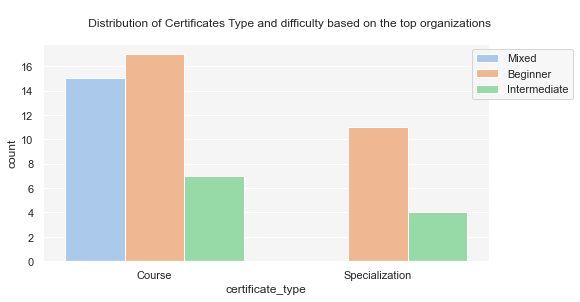

In [289]:
# Visualizing certificates and difficulties level for the top 10 courses
sns.set(rc={'figure.figsize':(8, 4), 'axes.facecolor':'whitesmoke',})
sns.countplot(data=top_org_coursera, 
              x='certificate_type', palette="pastel",
              hue='difficulty').set(title="""
              Distribution of Certificates Type and difficulty based on the top organizations
              """)

# Place legend to the right
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
fig.tight_layout()
plt.show()

### Conclusions

In conclusion, our analysis of the Coursera courses dataset revealed that the platform is mainly focused on offering beginner-level courses, and most of the certificates offered are general completion certificates. 

However, we also observed that the courses tend to have high ratings, with the majority of courses ranging between 4.6 and 4.8 on a scale of 1 to 5. This indicates that despite the beginner focus, the courses are generally well-received by students. 

In terms of enrollment, we found a right-skewed distribution in the number of students enrolled, with only a few courses having significantly more students than the rest of the data points. 

In summary, our analysis reveals that Coursera is a platform that places a strong emphasis on introductory content and beginner-level courses, but it also offers high-quality courses that are well-regarded by users. Nonetheless, we found that there are relatively few courses classified as advanced-level, which suggests that individuals seeking more advanced content may need to look elsewhere.

#### How would I improve my analysis?

While our analysis of the Coursera courses dataset provided valuable insights, there are several ways in which we could further improve our understanding of the platform and its users. For example, one way we could enhance our analysis is by requesting the course prices and exploring how they affect the students enrolled and the ratings behavior. It would be interesting to see if courses with higher prices tend to have lower enrollments and ratings, or if there is no correlation.

Another potential area is the distribution of courses by category. For instance, we could request a course category type to better understand the distribution of courses in tech and courses in well-being, and whether there are any patterns in the ratings and enrollments of these categories.

In addition, we could investigate whether Coursera is a good platform for language courses. By filtering the dataset to include only language courses, we could examine the enrollment and rating behavior for these courses specifically, and see how they compare to other courses in the dataset.

Another interesting question to explore would be how many of the people who enroll in Coursera courses actually finish them. We could request completion data and see what percentage of students who enroll complete the course, and how this varies by course difficulty, type of certificate, and other factors.

Finally, we could investigate the reasons why some students do not complete courses. By analyzing data on where students drop off in a course and why they do so, we could gain insights into how to design courses that better meet the needs of Coursera users